In [1]:
# import dependencies
import pandas as pd
import requests
import time
from datetime import datetime

key = 'P7xEmqFaamAMUwpkAMYQ3QZRDsA7H3Pz'

In [2]:
symbols = ['AAPL', 'TSLA', 'MSFT', 'FB', 'NKE']
dates = ['2022-04-01', 
    '2022-04-04', '2022-04-05','2022-04-06', '2022-04-07', '2022-04-08', 
    '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14']

# create a base url from polygon.io
base_url = 'https://api.polygon.io/v1/open-close/'

# # create an empty list to hold all of the urls
# url_list = []
# # create an empty list to hold the results in json format
# res = []
# # lists that will create the df
# stock_close = []
# stock_open = []
# percent_change = []
# stock_symbol = []

In [3]:
# create counters
record_count = 1
set_count = 1

# create an empty list to hold the stock data
stock_data = []

# print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

# loop through all the symbols in our list
for symbol in symbols:
    
    for i, day in enumerate(dates):
        
        #group urls in sets of 50 for logging purposes
        if (i % 5 == 0 and i >= 5):
            set_count += 1
            record_count = 1
            time.sleep(60)

        stock_url = base_url + symbol + '/' + day + '/?adjusted=false&apiKey=' + key

        # log the url, record, and set numbers and the city
        print(f'Processing Record {record_count} of Set {set_count} | {symbol}: {dates[i]}')
        
        # add 1 to the record count
        record_count += 1
        
        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            stock = requests.get(stock_url).json()
            # Parse out the needed data.
            stock_date = stock['from']
            stock_close = stock['close']
            stock_open = stock['open']
            stock_symbol = stock['symbol']
            percent_change = (stock_close - stock_open) / stock_close * 100
            # Append the city information into city_data list.
            stock_data.append({
                'date': stock_date,
                'close': stock_close,
                'open': stock_open,
                'symbol': stock_symbol,
                'percent change': percent_change
            })

    # If an error is experienced, skip the stock date.
        except:
            print("Not found. Skipping...")
            pass
    
    time.sleep(60)

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | AAPL: 2022-04-01
Processing Record 2 of Set 1 | AAPL: 2022-04-04
Processing Record 3 of Set 1 | AAPL: 2022-04-05
Processing Record 4 of Set 1 | AAPL: 2022-04-06
Processing Record 5 of Set 1 | AAPL: 2022-04-07
Processing Record 1 of Set 2 | AAPL: 2022-04-08
Processing Record 2 of Set 2 | AAPL: 2022-04-11
Processing Record 3 of Set 2 | AAPL: 2022-04-12
Processing Record 4 of Set 2 | AAPL: 2022-04-13
Processing Record 5 of Set 2 | AAPL: 2022-04-14
Processing Record 6 of Set 2 | TSLA: 2022-04-01
Processing Record 7 of Set 2 | TSLA: 2022-04-04
Processing Record 8 of Set 2 | TSLA: 2022-04-05
Processing Record 9 of Set 2 | TSLA: 2022-04-06
Processing Record 10 of Set 2 | TSLA: 2022-04-07
Processing Record 1 of Set 3 | TSLA: 2022-04-08
Processing Record 2 of Set 3 | TSLA: 2022-04-11
Processing Record 3 of Set 3 | TSLA: 2022-04-12
Processing Record 4 of Set 3 | TSLA: 2022-04-13
Processing Record 5 of Set 

In [32]:
stock_df = pd.DataFrame(stock_data)
stock_df = stock_df.set_index('date')

stock_df

,close,open,symbol,percent change
date,,,,
2022-04-01,174.31,174.030,AAPL,0.160633
2022-04-04,178.44,174.570,AAPL,2.168796
2022-04-05,175.06,177.500,AAPL,-1.393808
2022-04-06,171.83,172.360,AAPL,-0.308444
2022-04-07,172.14,171.160,AAPL,0.569304
2022-04-08,170.09,171.780,AAPL,-0.993592
2022-04-11,165.75,168.710,AAPL,-1.785822
2022-04-12,167.66,168.020,AAPL,-0.214720
2022-04-13,170.40,167.390,AAPL,1.766432


In [33]:
aapl = stock_df[stock_df['symbol'] == 'AAPL']
tsla = stock_df[stock_df['symbol'] == 'TSLA']
msft = stock_df[stock_df['symbol'] == 'MSFT']
fb = stock_df[stock_df['symbol'] == 'FB']
nke = stock_df[stock_df['symbol'] == 'NKE']

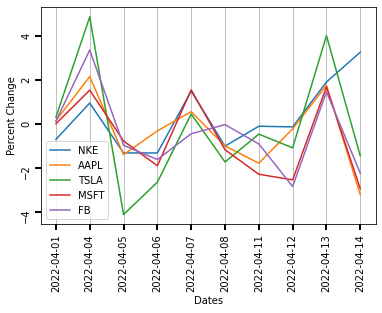

In [65]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.plot(nke['percent change'], label='NKE')
ax.plot(aapl['percent change'], label='AAPL')
ax.plot(tsla['percent change'], label='TSLA')
ax.plot(msft['percent change'], label='MSFT')
ax.plot(fb['percent change'], label='FB')

ax.legend()

ax.grid(axis='x')
ax.set_ylabel('Percent Change')
ax.set_xlabel('Dates')

ax.tick_params(direction='out', length=6, width=2,
                labelrotation=90)

plt.show()

In [117]:
date_range = pd.date_range(input("What day would you like to start?"), input('What day would you like to end?'), freq='B')

In [133]:
from datetime import datetime

dates_df = pd.DataFrame(date_range)

dates = []

for date in dates_df[0]:
    date_str = date.strftime('%Y-%m-%d')
    dates.append(date_str)

dates

['2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-07',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-14',
 '2022-01-17',
 '2022-01-18',
 '2022-01-19',
 '2022-01-20',
 '2022-01-21',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-31']

datetime.datetime(2020, 10, 10, 0, 0)